In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "db_one_cleaned.csv"
data1 = pd.read_csv(file_path)

# Crime Type Distribution

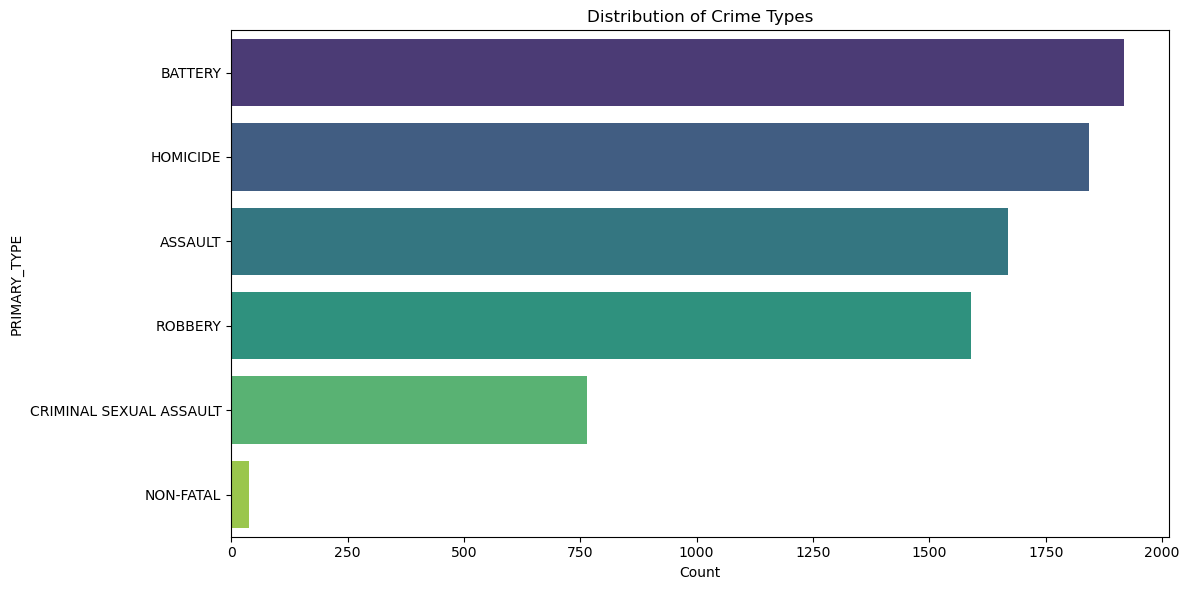

In [3]:
crime_type_counts = data1['PRIMARY_TYPE'].value_counts()

# Plotting Crime Type Distribution
plt.figure(figsize=(12, 6))
sns.barplot(y=crime_type_counts.index, x=crime_type_counts.values, palette="viridis")
plt.title("Distribution of Crime Types")
plt.xlabel("Count")
# plt.ylabel("Crime Type")
plt.tight_layout()

## Temporal Analysis

In [4]:
# Convert `TIME_PERIOD_START` and `TIME_PERIOD_END` to datetime format
data1['TIME_PERIOD_START'] = pd.to_datetime(data1['TIME_PERIOD_START'], errors='coerce')
data1['TIME_PERIOD_END'] = pd.to_datetime(data1['TIME_PERIOD_END'], errors='coerce')

# Extract year and quarter for easier analysis
data1['YEAR'] = data1['TIME_PERIOD_START'].dt.year
data1['QUARTER'] = data1['TIME_PERIOD_START'].dt.to_period('Q')

# Verify the conversion and extracted features
data1[['TIME_PERIOD_START', 'TIME_PERIOD_END', 'YEAR', 'QUARTER']].head()


,TIME_PERIOD_START,TIME_PERIOD_END,YEAR,QUARTER
0,2011-01-01,2011-03-31,2011,2011Q1
1,2000-10-01,2000-12-31,2000,2000Q4
2,1992-10-01,1992-12-31,1992,1992Q4
3,2015-10-01,2015-12-31,2015,2015Q4
4,2017-10-01,2017-12-31,2017,2017Q4


# Yearly Crime Trends

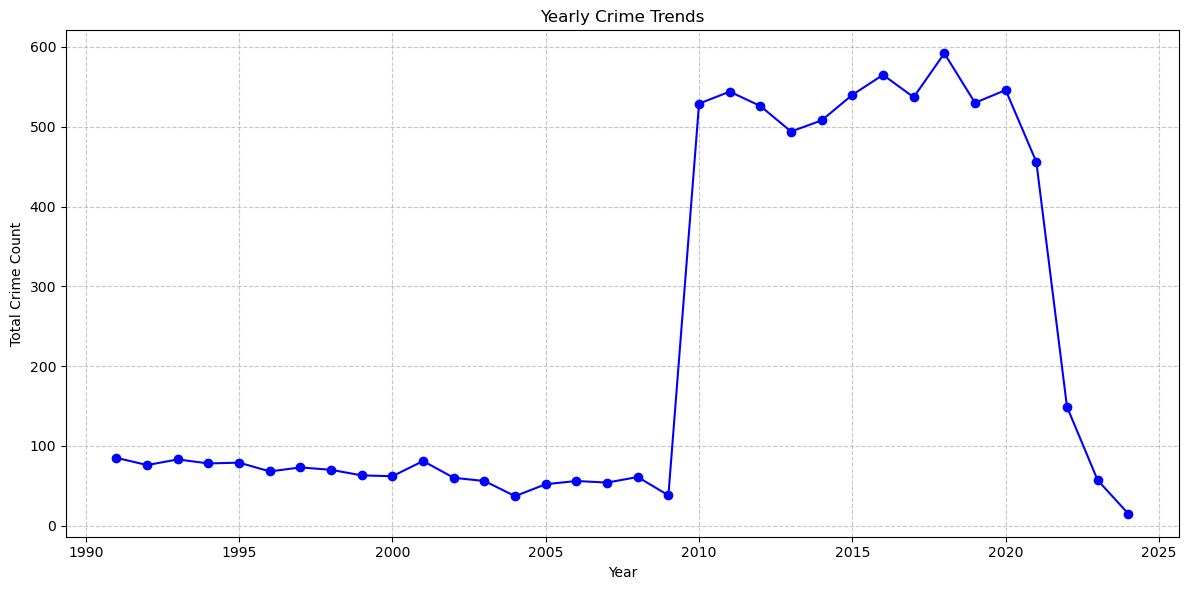

In [5]:
# Group by YEAR to analyze overall crime trends
yearly_crime_counts = data1.groupby('YEAR').size()

# Plotting Yearly Crime Trends
plt.figure(figsize=(12, 6))
yearly_crime_counts.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title("Yearly Crime Trends")
plt.xlabel("Year")
plt.ylabel("Total Crime Count")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Quaterly Crime Trends

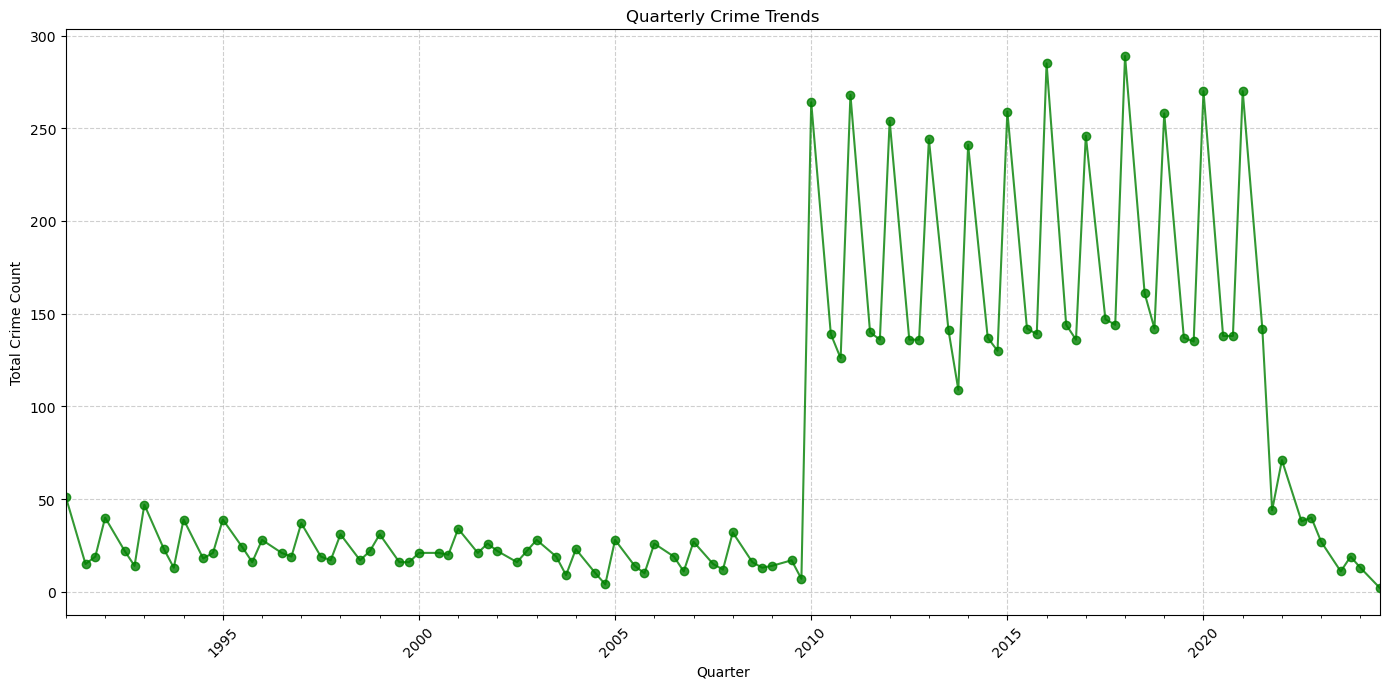

In [6]:
# Group by QUARTER to analyze crime trends
quarterly_crime_counts = data1.groupby('QUARTER').size()

# Plotting Quarterly Crime Trends
plt.figure(figsize=(14, 7))
quarterly_crime_counts.plot(kind='line', marker='o', color='g', linestyle='-', alpha=0.8)
plt.title("Quarterly Crime Trends")
plt.xlabel("Quarter")
plt.ylabel("Total Crime Count")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yearly Trends for Top Crime Types

In [ ]:
top_crime_types = ['BATTERY', 'ASSAULT', 'ROBBERY']
yearly_top_crimes = data1[data1['PRIMARY_TYPE'].isin(top_crime_types)].groupby(['YEAR', 'PRIMARY_TYPE']).size().unstack()

# Plotting Yearly Trends for Top Crime Types
yearly_top_crimes.plot(kind='line', figsize=(14, 7), marker='o', alpha=0.9)
plt.title("Yearly Trends for Top Crime Types")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()